## Content of Part-3

Shallow copy and Deep copy

Function

Create a dictionary with function values

Global keyword

Recursion

zip()

Lambda function

filter()

map()

reduce()

<a href='#decorator'>Decorators</a>

Modules

# Interning

In [6]:
a = 22
b = 22
c = a

print(id(a))
print(id(b))
print(id(c))

1762972625872
1762972625872
1762972625872


In [1]:
a = [1, 2, 3]
b = [1, 2, 3]
c = a

print(id(a))
print(id(b))
print(id(c)) 

1621639526528
1621637811456
1621639526528


As we can wee above that when two immutable objects point to same memory location while immutable object points to different memory location.

In the first code snippet, Python uses a mechanism called "integer interning" to optimize memory usage for small integers. Small integers in Python are often interned, meaning that multiple variables with the same integer value will share the same memory reference. This is done to improve memory efficiency. When you assign a = 22 and b = 22, both a and b end up referencing the same memory location for the integer 22. Therefore, when you print id(a) and id(b), you get the same ID.

In the second code snippet, you are working with lists. Lists are mutable objects in Python, and they are not interned like small integers. When you create a and b as lists with the same content, they are distinct objects with different memory references. c is assigned to reference the same list as a, so id(c) is the same as id(a. However, id(b) is different because it is a separate list object.

# Shallow copy and Deep copy

#### Shallow Copy:

- A shallow copy creates a new object but does not recursively duplicate the objects inside the original object.
- The new object contains references to the same nested objects as the original object. Changes made to nested objects within the shallow copy will be reflected in the original object and vice versa.
- Shallow copying is typically performed using built-in functions like `copy.copy()` in Python.

**OR**

- A shallow copy creates a new object which stores the reference of the original elements.

- So, a shallow copy doesn't create a copy of nested objects, instead it just copies the reference of nested objects. This means, a copy process does not recurse or create copies of nested objects itself.


**OR**

A shallow copy creates a new compound object and then references the objects contained in the original within it, which means it constructs a new collection object and then populates it with references to the child objects found in the original. The copying process does not recurse and therefore won’t create copies of the child objects themselves. In the case of shallow copy, a reference of an object is copied into another object. It means that any changes made to a copy of an object do reflect in the original object. In python, this is implemented using the `copy()` function. 

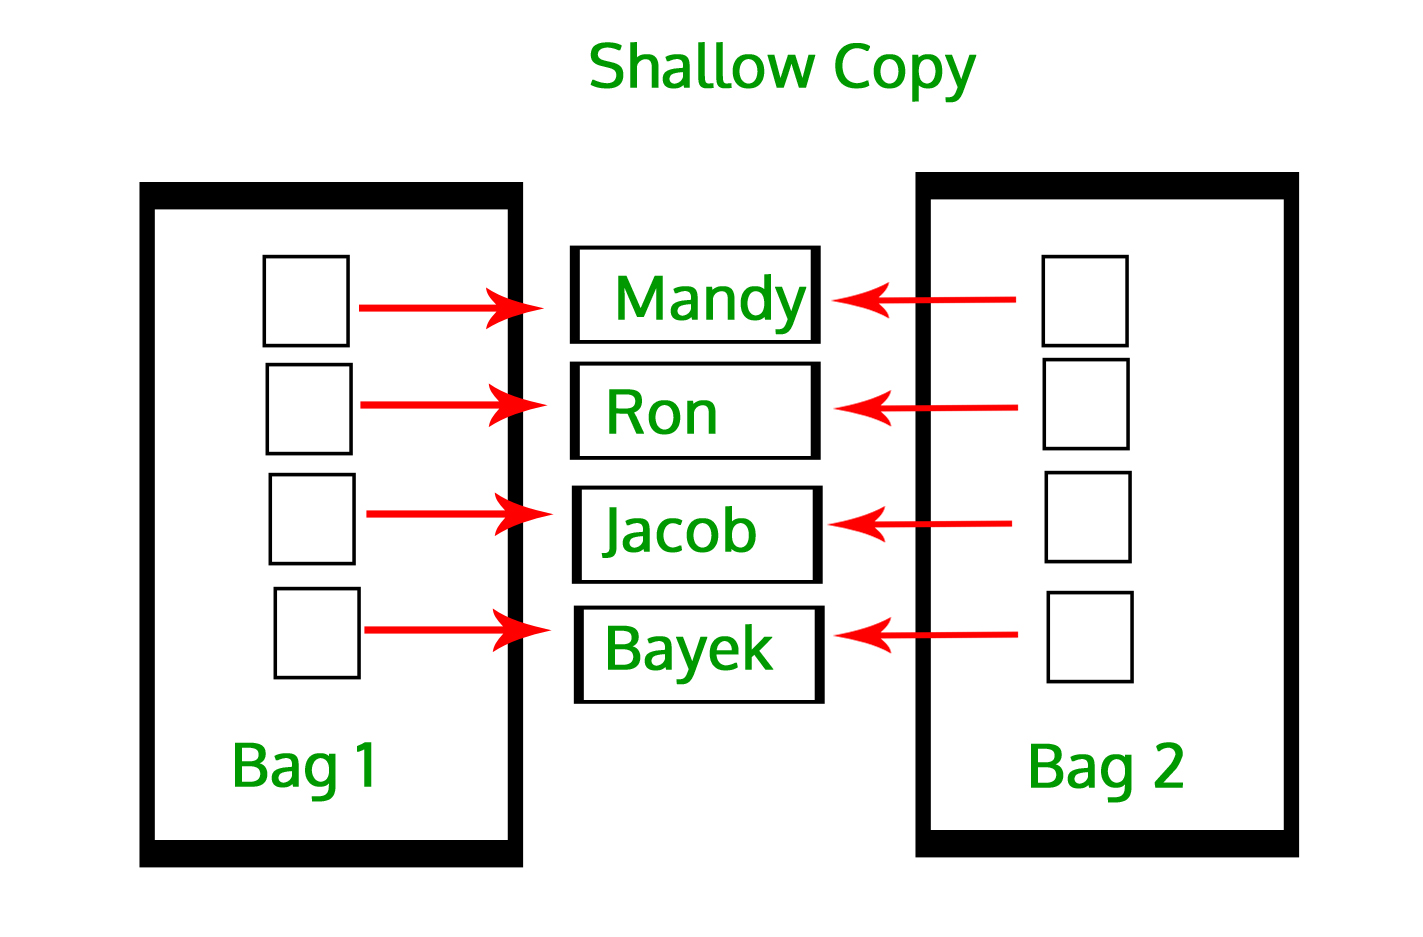

In [1]:
import copy

old_list = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
new_list = copy.copy(old_list)

print(id(old_list))
print(id(new_list))

print("Old list:", old_list)
print("New list:", new_list)

1828461471488
1828461483136
Old list: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
New list: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [6]:
# Adding [4, 4, 4] to old_list, using shallow copy

import copy

old_list = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
new_list = copy.copy(old_list)

print(id(old_list))
print(id(new_list))

old_list.append([4, 4, 4])

print("Old list:", old_list)
print("New list:", new_list)

print(id(old_list))
print(id(new_list))

1828461511616
1828462056960
Old list: [[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]]
New list: [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
1828461511616
1828462056960


In the above program, we created a shallow copy of `old_list`. The `new_list` contains references to original nested objects stored in `old_list`. Then we add the new list i.e <pre>[4, 4, 4]</pre> into `old_list`. This new sublist was not copied in `new_list`.

However, when you change any nested objects in `old_list`, the changes appear in `new_list`. **Example:**

In [12]:
import copy

old_list = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
new_list = copy.copy(old_list)

old_list[1][1] = 'AA'
new_list[0][0] = 'BB'

print("Old list:", old_list)
print("New list:", new_list)

Old list: [['BB', 1, 1], [2, 'AA', 2], [3, 3, 3]]
New list: [['BB', 1, 1], [2, 'AA', 2], [3, 3, 3]]


In [16]:
import copy

original_list = [1,2,3,4,5]
shallow_copy = copy.copy(original_list)

shallow_copy[0]=89
print("Original: ",original_list)
print("Copy: ",shallow_copy)

Original:  [1, 2, 3, 4, 5]
Copy:  [89, 2, 3, 4, 5]


In [10]:
import copy

my_list = [1, 2, 3, 4, ['a', 'b']]
my_list_copy = copy.copy(my_list)

my_list[1] = 66

print(my_list)
print(my_list_copy)

[1, 66, 3, 4, ['a', 'b']]
[1, 2, 3, 4, ['a', 'b']]


In [11]:
import copy

my_list = [1, 2, 3, 4, ['a', 'b']]
my_list_copy = copy.copy(my_list)

my_list[1] = 66
my_list[4][0] = 'z'

print(my_list)
print(my_list_copy)

[1, 66, 3, 4, ['z', 'b']]
[1, 2, 3, 4, ['z', 'b']]


#### Deep Copy:

- A deep copy creates a completely new object with a new set of nested objects. It recursively duplicates all objects, including nested objects, from the original object.
- Changes made to the nested objects within the deep copy will not affect the original object, and vice versa.
- Deep copying is typically performed using built-in functions like `copy.deepcopy()` in Python.

**OR**

- A deep copy creates a new object and recursively adds the copies of nested objects present in the original elements.

- Let’s continue with example 2. However, we are going to create deep copy using deepcopy() function present in copy module. The deep copy creates independent copy of original object and all its nested objects.

**OR**

A deep copy creates a new compound object before inserting copies of the items found in the original into it in a recursive manner. It means first constructing a new collection object and then recursively populating it with copies of the child objects found in the original. In the case of deep copy, a copy of the object is copied into another object. It means that any changes made to a copy of the object do not reflect in the original object. 



In [13]:
import copy

old_list = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
new_list = copy.deepcopy(old_list)

print(id(old_list))
print(id(new_list))

print("Old list:", old_list)
print("New list:", new_list)

1828461485248
1828461483712
Old list: [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
New list: [[1, 1, 1], [2, 2, 2], [3, 3, 3]]


In [15]:
# Adding [4, 4, 4] to old_list, using shallow copy

import copy

old_list = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
new_list = copy.deepcopy(old_list)

print(id(old_list))
print(id(new_list))

old_list.append([4, 4, 4])

print("Old list:", old_list)
print("New list:", new_list)

print(id(old_list))
print(id(new_list))

1828458403520
1828461539648
Old list: [[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]]
New list: [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
1828458403520
1828461539648


In [14]:
import copy

old_list = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
new_list = copy.deepcopy(old_list)

old_list[1][0] = 'BB'
new_list[1][0] = 'DD'

print("Old list:", old_list)
print("New list:", new_list)

Old list: [[1, 1, 1], ['BB', 2, 2], [3, 3, 3]]
New list: [[1, 1, 1], ['DD', 2, 2], [3, 3, 3]]


In [17]:
import copy

original_list = [1,2,3,4,5]
shallow_copy = copy.deepcopy(original_list)

shallow_copy[0]=89
print("Original: ",original_list)
print("Copy: ",shallow_copy)

Original:  [1, 2, 3, 4, 5]
Copy:  [89, 2, 3, 4, 5]


# FUNCTION

In [13]:
# function should always be declared before its call

# function declaration

def greet():
    print("hello")
    print("Good morning")
    
greet() # function call

hello
Good morning


In [1]:
# lets obeserve this program very carefully

def func1():
    print("func1")
    func2() # function call
    
def func2(): # called function definition
    print("func2")
func1()

func1
func2


In the above program, we called function `func2()` before defining the function `func2()`. Since we have called function before its definition but still we are not getting any error. Why ?

#### Exaplanation:

The reason this code is not generating an error despite calling a function before its definition is because of **Python's two-pass compilation process**.

In Python, when a module is imported or executed, the interpreter first reads through the entire file to create a symbol table of all the names defined in the module. This is called the first pass. During this pass, Python does not actually execute any code, but it records the names of functions, variables, and other objects in the module's symbol table.

Once the symbol table has been created, Python then goes through the code a second time and actually executes it. During this pass, Python can look up the definitions of functions and other objects in the symbol table that was created during the first pass.

In our code, when `func1()` is defined, Python adds its name to the symbol table, but does not execute its body. The function `func2()` is then defined, and when `func1()` is called, Python is able to look up the definition of `func2()` in the symbol table that was created during the first pass, and execute it without raising an error.

However, **it is generally considered a good practice to define functions before they are called to make the code more readable and easier to understand**.

In [14]:
# passing arguments to the function

def add(x,y): # function accepting arguments
    c=x+y
    print(c)
    
add(4,9) # passing argument

13


In [15]:
# returning single value from function

def add(x,y): # function accepting arguments
    c=x+y
    return c # returning value to function

# function will return a value
# so we need to collect or store that value in a variable
result = add(4,9) # making function call storing returned value in a variable
print(result)

13


## Create a dictionary with function values

In [1]:
# Define some functions
def add(a, b):
    return a + b

def subtract(a, b):
    return a - b

def multiply(a, b):
    return a * b

def divide(a, b):
    if b == 0:
        return "Cannot divide by zero"
    return a / b

# Create a dictionary with function values
function_dict = {
    'addition': add,
    'subtraction': subtract,
    'multiplication': multiply,
    'division': divide
}

# Use the functions from the dictionary
result1 = function_dict['addition'](10, 5)
result2 = function_dict['division'](20, 4)

print("Result of addition:", result1)
print("Result of division:", result2)

Result of addition: 15
Result of division: 5.0


### Note: 

(1) In Python, we can return multiple value at a time

(2) In Python, function can take another function as an argument.

(3) In Python, we can also define function inside function.

(4) In Python, we can return also another function as value

# (1)

#### In Python, we can return multiple value at a time

In [1]:
# returning multiple value from function

def add(x,y): # function accepting arguments
    c=x+y
    d=x-y
    return c,d # returning two value to function

# function will return two value
# so we need to collect or store that value in two variable
result1,result2 = add(4,9) # storing two value returned by function
print(result1)
print(result2)

13
-5


# (2)

#### In Python, function can take another function as an argument.

In [20]:
# Since functions are also objects, we can also pass functions as arguments to other functions:

def inc(x):
    return x + 1

def operate(func, x):
    result = func(x)
    return result

print(operate(inc, 3))

4


# (3)

#### In Python, we can also define function inside function

In [21]:
# In Python, we can also define a function inside a function: 

def print_msg(message):
    greeting = "Hello"
    def printer():
        print(greeting, message)

    printer()


print_msg("Python is awesome")

Hello Python is awesome


# (4)

#### In Python, we can return also another function as value

In [22]:
# Functions is that they can also return a function as a value. Let's modify our previous code:

def print_msg(message):
    greeting = "Hello"
    def printer():
        print(greeting, message)

    return printer

func = print_msg("Python is awesome")
func()

Hello Python is awesome


#### Closure function

Do you notice something weird here? Even though `print_msg()` function is done executing, the returned inner `printer()` function can still access the `message` and `greeting` variables. Such a function is called a closure function.

A **`closure`** is simply an inner function that remembers the values and variables in its enclosing scope even if the outer function is done executing.

Python Decorators make an extensive use of `closures`.

## Function arguments

In [2]:
def update(x):
    x=8
    print("x ",x) # 8

a=10
update(a)
print("a ",a) # 10

x  8
a  10


### In general,

When we pass value x to a function and function accepting argument is y:-

Then in `call by value`, if we change the value of y; it will not affect x. Both x and y will have two different address in call by value.

But in `call by reference`, if we passing address of x not value and the moment we change the value of y it will affect x as well. Both x and y will have same address.



When we pass value to function and then we change value in that function then that change will not reflect in `main()` function.

But in passing address, that change will reflect in `main()` function

### Note:

In python, **we don't have concept of `pass by value` and `pass by reference`**.

In [3]:
# example

def update(x):
    print(id(x))
    
    x=8 # changing value inside function
    print("x = ",x) # 8

a=10
print(id(a))
update(a)
print("a = ",a) # 10

2165748230736
2165748230736
x =  8
a =  10


In above result we got same id that means it is not pass by value

### Remark:

a,x refers to same object that is it is not pass by value here in Python

In [4]:
# example

def update(x):
    print(id(x))
    
    x=8 # changing value inside function
    
    print(id(x)) # id after changing value
    print("x = ",x)

a=10
print(id(a))
update(a)
print("a = ",a)

2165748230736
2165748230736
2165748230672
x =  8
a =  10


### Overall result

In python, **whenever you pass a value or whenever you call function by passing value, they will share same id that is variable which have been passed and variable which we accessing get here, but the moment when you change value it will change address**.

`Integer`, `String` they are immutable thats why the moment we change value `x=8` it will change the address.

But what if we use something which are mutable like `list`:-

In [5]:
# if muttable

def update(lst):
    print(id(lst))
    
    lst[1]=99
    print(id(lst))
    print("list: ",lst)
    
lst=[1,2,3]
print(id(lst))
update(lst)
print("list: ",lst)

2165832484224
2165832484224
2165832484224
list:  [1, 99, 3]
list:  [1, 99, 3]


### Summary

Python uses a mechanism that is sometimes referred to as **`call by object reference`** or **`call by sharing`**. This is a somewhat unique approach compared to the traditional `call by value` and `call by reference` semantics used in some other programming languages. Let's clarify how this works in Python:

- When you pass an immutable object (e.g., integers, strings, tuples) to a function, you cannot change the original value from within the function. This behavior is similar to "call by value." However, you can reassign the parameter to a new object, and this will not affect the original object.

In [1]:
def modify_value(x):
    print(id(x))
    x = x + 1
    print(id(x))

a = 5
print(id(a))
modify_value(a)
print(a)  # Output: 5

1762972625328
1762972625328
1762972625360
5


- When you pass a mutable object (e.g., lists, dictionaries) to a function, any changes made to the object inside the function affect the original object. This behavior is similar to "call by reference."

In [2]:
def modify_list(my_list):
    print(id(my_list))
    my_list.append(42)
    print(id(my_list))
    
my_list = [1, 2, 3]
print(id(my_list))
modify_list(my_list)
print(my_list)  # Output: [1, 2, 3, 42]

1763049979840
1763049979840
1763049979840
[1, 2, 3, 42]


To summarize, Python's parameter passing mechanism is based on passing references to objects. 
- `For immutable objects, any changes to the parameter are local and do not affect the original value`. This can be a bit different from the strict definitions of "call by value" and "call by reference" used in some other programming languages.

- `If the object is mutable, changes made to the object within a function will be reflected in the original object`. However, you cannot change the reference itself (e.g., assigning a new object to the parameter) and expect it to affect the original reference outside the function. :

In [3]:
def modify_list(my_list):
    print(id(my_list))
    my_list = [4, 5, 6]  # This creates a new list and assigns it to the local parameter
    print(id(my_list))
    
my_list = [1, 2, 3]
print(id(my_list))
modify_list(my_list)
print(my_list)  # Output: [1, 2, 3]

1763054276160
1763054276160
1763054392384
[1, 2, 3]


### Types of arguments

There are two types of arguments:

(1) Actual arguments

(2) Formal arguments

In [6]:
# actual and formal arguments

def add(a,b): # formal argument (when defining)
    c=a+b
    print(c)

add(4,6) # actual argument (when passing)

10


###### Actual arguments is of 4 types:-

(1) Position

(2) Keyword

(3) default

(4) Variable length

In [7]:
# position argument

def person(name,age):
    print(name)
    print(age)

person("Python",70) # postion argument

Python
70


In [8]:
# keyword argument
    # if we dont sure about the sequence of parameter

def person(name,age):
    print(name)
    print(age)

person(age=70,name="Python") # keyword argument

# if we do pass by person(70,"python")
    # then this will give an error

Python
70


In [9]:
# default argument

def person(name,age=99): # default argument
    print(name)
    print(age)

person("Python") # if we dont pass second value it will take default value
                   
person("Java",55)  # but if we pass the second value then it will over write default value

Python
99
Java
55


In [9]:
# variable length argument

def add(a, *b):
    c=a+b # Error
    print(c)
    
add(1,2,3,4,5) # passing mutiple arguments

# look at below cell for explanation

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

###### What happened above:-

(1) variable a will have a fixed or confirmed value that is 1 (here)

(2) `*b` means it can have multiple value

So, 1 is assigned to a and (2,3,4,5) is assigned to b as a **`tuple`**

Hence, we are getting error because we are adding integer with tuple

In [11]:
# variable length argument

def add(a, *b):
    c=a
    for i in b: # handling tuple values
        c=c+i
    print(c)
    
add(1,2,3,4,5) # passing mutiple arguments

15


In [12]:
# lets observe below code

def person(name, *data):
    print(name)
    print(data)

person("ram",28,"Muz",12345)

ram
(28, 'Muz', 12345)


###### Consider:

Consider a situation when user is passing name, age,mobile, addres etc...

In above cell, if we print it individually and we are also dont know what is user passing that is 28 is age or mobile or anything else.

So, we we have to convey our message which is as below:

In [3]:
# keyworded variable length argument

def person(name, **data):
    print(name)
    print(data)

person("ram",age=28,city="Muz",pin=12345)
# look at below cell for explanation

ram
{'age': 28, 'city': 'Muz', 'pin': 12345}


###### What happend above:

When we accept mutiple arguments with the help of keyword then it will be stored as dictionary datatype in key value pair.

### Remark:

When we say `**` that is `**data`, we are passing mutiple argument with the help of keyword

single `*` ( that is `*data`) will give error in this case

In [2]:
# keyworded variable length argument

def person(name, **data):
    print(name)
    print(data.items())
    for i,j in data.items():
        print(i,j)

person("ram",age=28,city="Muz",pin=12345)


ram
dict_items([('age', 28), ('city', 'Muz'), ('pin', 12345)])
age 28
city Muz
pin 12345


In [1]:
lst=[("age",33),("city","mux"),("pin",3)]
for i,j in lst:
    print(i,j)

age 33
city mux
pin 3


# GLOBAL KEYWORD

In [3]:
a=10 # global variable

def some():
    a=15 # local variable
    print(a)
    print(id(a)) # different id  

some()
print("Outside:",a)
print(id(a))

15
2729101585136
Outside: 10
2729101584976


### Note:

Inside function preference is always given to local variable

In [4]:
# if we dont have variable inside function

a=10 # global variable

def some():

    print("Inside: ",a)
    print(id(a))

some()
print("Outside:",a)
print(id(a))

# hence we can access global variable inside function as well

Inside:  10
2729101584976
Outside: 10
2729101584976


In [5]:
# if we dont have variable inside function

a=10 # global variable
print(id(a))

def some():
    global a # explictly specifying a is global variable inside function
    print(id(a))
    
    a=15 # moment we re-assign, it will create a new memory
    print(id(a))
    
    print("Inside: ",a)
    # we dont have local variable here

some()
print("Outside:",a)  # when you change the value of an integer variable, 
                        # a new object is created with the new value, and the original memory location is no longer used.

2729101584976
2729101584976
2729101585136
Inside:  15
Outside: 15


Keep in mind that the `global` keyword is used to work with global variables within functions. In Python, global variables are accessible from any part of the code, but the `global` keyword allows you to modify them from within functions where you might also have local variables with the same name.

In [1]:
x = 10
print(id(x))

def my_function():
    global x
    print(id(x))
    x += 5 # still it is global variable
    
    print(id(x))
    print(x)

my_function()
print(x)
print(id(x)) # when you change the value of an integer variable, 
            # a new object is created with the new value, and the original memory location is no longer used.

2296437762640
2296437762640
2296437762800
15
15
2296437762800


**Explanation:**

In this example, we declare a variable `x` outside the function and set its value to `10`. Inside the function `my_function()`, we use the `global` keyword to indicate that we want to access and modify the `global variable x` rather than creating a new local variable with the same name. We then add `5` to `x` and print the resulting value.

When we call the `my_function()` function, it prints the value of `x`, which is `15`. Then, when we print `x` outside the function, it prints the modified value of `x`, which is `15`.

Without using the `global` keyword, a new local variable `x` would have been created inside the function, which would not have affected the value of the global variable `x`.

In the above example, the global variable `x` is modified inside the function `my_function()` using the global keyword. This modification changes the value of `x` in memory, which means that the memory location of `x` also changes.

When you re-assign the value of `a` inside the `some()` function, a new memory location is allocated because **integers in Python are immutable objects**. This means that **when you change the value of an integer variable, a new object is created with the new value, and the original memory location is no longer used**.

When you declare `a` as a `global` variable inside the `some()` function, you are telling Python to use the same variable defined in the `global scope`. However, when you assign a new value to `a`, Python creates a new object with the new value and stores it in a new memory location. This is because Python integers are immutable, and you cannot modify the value of an existing integer object in place.

When you modify the value of an integer variable, Python creates a new object with the new value and allocates a new memory location to store it. The original object with the old value remains unchanged.

Therefore, when you modify the value of the `x` variable inside the function, Python creates a new integer object with the value of `15` and allocates a new memory location to store it. The `x` variable is then updated to point to this new memory location holding the new value. The original memory location holding the value `10` is not modified and still exists in memory.

**Immutable objects** like `strings` or `tuples` cannot be changed in-place, so modifying their value always results in a new object being created in memory.

It's worth noting that this behavior is specific to Python's implementation of integers, and other programming languages may handle this differently. Some programming languages may modify integers in place, while others may create a new object in memory for each modification.

Even though a new memory location is allocated for the variable `x` when it is modified inside the function using the `global` keyword, it is still a **global variable**.

When you declare a variable as `global` inside a function, you are telling Python to look for the variable in the global namespace rather than creating a new local variable with the same name. This means that any changes you make to the variable inside the function using the `global` keyword will affect the global variable outside the function.

So in the above example, even though a new memory location is allocated for `x` when it is modified inside the `my_function()` function, it is still a global variable because it was declared as such using the `global` keyword. This means that the modified value of `x` is accessible outside the function and can be printed using print(x) after the function call.

### Note:

Using global variables can sometimes make it harder to reason about the behavior of your program, and can lead to bugs and unexpected behavior. **It's generally recommended to avoid using global variables when possible, and instead use function arguments and return values to communicate between different parts of your program**.

### globals()

###### Can we have local a and global a variable in same function ?

Its not possible.

We want to achieve global and local in same function.

So, we want local variable a and also want to change global variable a

For that we can use `globals()`

In [4]:
a=10 # global variable
print(id(a))

def some():
    a=9 # local variable
    
    x=globals()['a'] # globals return all global variable, but we want access to a
    print(id(x)) # both id same
    print("Inside: ",a)
    globals()['a']=99 # changing global from function

some()
print("Outside:",a)

2583454509648
2583454509648
Inside:  9
Outside: 99


### Python Nonlocal Variables

In Python, **nonlocal variables are used in nested functions whose local scope is not defined**. This means that the variable can be neither in the local nor the global scope.

We use the `nonlocal` keyword to create nonlocal variables.For example:

In [5]:
# outside function 
def outer():
    x=10 
    print(id(x))

    # nested function  
    def inner():

        # declare nonlocal variable
        nonlocal x
        print(id(x))
        x+=5
        
        print(id(x))
        print("inner:", x)

    inner()
    print("outer:", x)

outer()

1765784447568
1765784447568
1765784447728
inner: 15
outer: 15


##### Explanation:

In this example, we have two nested functions `outer()` and `inner()`. The variable `x` is defined inside the `outer()` function and set to `10`. Inside the `inner()` function, we use the `nonlocal` keyword to indicate that we want to modify the value of `x` in the enclosing scope (i.e., the `outer()` function) rather than creating a new local variable with the same name. We then add `5` to `x` and print the resulting value.

When we call the `outer()` function, it calls the `inner()` function which modifies the value of `x` and prints the updated value. After that, the `outer()` function prints the value of `x` again, showing that the value has been modified inside the `inner()` function.

**Without using the `nonlocal` keyword, we would not be able to modify the value of `x` inside the `inner()` function**, because it would be treated as a new local variable with the same name. Instead, using `nonlocal` allows us to modify the value of the variable in the enclosing scope.

When we modify the variable `x` using the `nonlocal` keyword inside the `inner()` function, a new object is created in memory to hold the updated value. This is because `integers` are immutable objects in Python, so any operation that changes their value creates a new object in memory.

It's worth noting that `nonlocal` can only be used to access variables in enclosing scopes, not in any outer scopes beyond that. If you need to access a variable in an outer scope beyond the immediate enclosing scope, you would need to use the `global` keyword instead.

In [1]:
# without using nonlocal

def outer():
    x = 10
    
    def inner():
        x += 5 # Error because this x is not in local scope(look at indentation)
        print("Inner function:", x)
        
    inner()
    print("Outer function:", x)

outer()

UnboundLocalError: local variable 'x' referenced before assignment

### Note: 

If we change the value of a nonlocal variable, the changes appear in the local variable.

### Passing to list to function

In [1]:
def count(lst):
    even=0
    odd=0
    for i in lst:
        if i%2==0:
            even+=1
        else:
            odd+=1
    return even,odd

lst=[20,3,4,7,9,11,77]
even,odd=count(lst)
print("Even: {} and odd: {}".format(even,odd))

Even: 2 and odd: 5


In [3]:
# program to print fibonacci series

def fib(n):
    a=0
    b=1
    if n==1:
        print(a)
    else:
        print(a)
        print(b)
        
        for i in range(2,n):
            c=a+b
            print(c)
            a=b
            b=c
            
fib(2)

0
1


In [2]:
# program to print factorial of number

def fact(n):
    f=1
    for i in range(1,n+1):
        f=f*i
    return f
x=4
result=fact(x)
print(result)

24


# RECURSION

By default, we can print things using recursion only specified specified limit only.

In [3]:
# checking recursion limit

import sys
print(sys.getrecursionlimit())

3000


In [9]:
# increase recursion limit

import sys

sys.setrecursionlimit(5000)
print(sys.getrecursionlimit())

5000


In [6]:
# program to print fibonacci series

def fib(n):
    if n<=1:
        return n
    else:
        return fib(n-1)+fib(n-2)
n=3
for i in range(n):
    print(fib(i),end=" ")

0 1 1 

In [11]:
# factorial of number using recursion

def fact(n):
    if n<=1:
        return n
    return n*fact(n-1)

result=fact(5)
print(result)

120


#### Advantages of Recursion

* Recursive functions make the code look clean and elegant.
* A complex task can be broken down into simpler sub-problems using recursion.
* Sequence generation is easier with recursion than using some nested iteration.

#### Disadvantages of Recursion

* Sometimes the logic behind recursion is hard to follow through.
* Recursive calls are expensive (inefficient) as they take up a lot of memory and time.
* Recursive functions are hard to debug.

## zip()

The `zip()` method in Python is **used to combine multiple iterables (e.g., lists, tuples, sets, etc.) into a single iterable**, where each element of the resulting iterable contains the corresponding elements from each of the input iterables.

The `zip()` method **takes in one or more iterables as arguments and returns a zip object**, which is an iterator of tuples where the i-th tuple contains the i-th element from each of the input iterables.

In [13]:
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']

zipped = zip(list1, list2)

# print the zipped object
print(zipped)

# convert the zip object to a list
result = list(zipped)

# print the resulting list
print(result)

[(1, 'a'), (2, 'b'), (3, 'c')]


In [14]:
# combining 3 lists

list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']
list3 = [True, False, True]

zipped = zip(list1, list2, list3)

# convert the zip object to a list
result = list(zipped)

# print the resulting list
print(result)

[(1, 'a', True), (2, 'b', False), (3, 'c', True)]


In [18]:
# combining list of different length

list1 = [1, 2, 3]
list2 = ['a', 'b', 'c', 'd']

zipped = zip(list1, list2)

# convert the zip object to a list
result = list(zipped)

# print the resulting list
print(result)

[(1, 'a'), (2, 'b'), (3, 'c')]


In [19]:
# combining list of different length

list1 = [1, 2, 3, 4, 5]
list2 = ['a', 'b', 'c', 'd']

zipped = zip(list1, list2)

# convert the zip object to a list
result = list(zipped)

# print the resulting list
print(result)

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]


### Note:

If the input iterables are of different lengths, the resulting iterable will only contain tuples up to the length of the shortest input iterable. 

**The `zip()` method is often used with for loops to iterate over multiple iterables simultaneously**. 

Here's an example of using `zip()` in a for loop:

In [20]:
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']

# iterate over the zipped object using a for loop
for item1, item2 in zip(list1, list2):
    print(item1, item2)

1 a
2 b
3 c


# ANONYMOUS FUNCTION / LAMBDA:

function without name

function are object in python.
We can pass function to function

In [4]:
f=lambda a:a*a # lambda function
    # f represent function
    # a is argument which we passing here
    # a*a operation we want to perform with argument
result=f(5) # call lambda function
print(result)

25


In [5]:
# example

f=lambda a,b:a+b

result=f(9,6)
print(result)

15


### Note:

We can pass n number of argument in anonymous function but it should be one expression.

**Lambda functions can be used to create `closures`**, which are functions that remember the values of variables in the enclosing scope even if they are not in that scope.

Example:-

In [9]:
def addx(x):
    return lambda y: x + y

add5 = addx(5)
print(add5(3)) # Output: 8
print(add5(7)) # Output: 12

8
12


#### Explanation:

In this example, the `addx()` function returns a lambda function that adds its argument `y` to the value of `x`, which is passed as an argument to `addx()`. The returned lambda function is a closure because it remembers the value of `x` even after `addx()` has returned.

We then call `addx(5)` to create a new function `add5` that adds `5` to its argument. We can then call `add5(3)` and `add5(7)` to get the results `8` and `12`, respectively. The lambda function created by `addx(5)` remembers the value of `x=5`, which is used every time `add5()` is called.

## filter()

The `filter()` function returns an iterator were the items are filtered through a function to test if the item is accepted or not.

##### syntax : `filter (function , iterable)`

 This function is used to filter out elements from a sequence based on some condition.

In [11]:
# filter() will take list from user and filter list to give user values

def is_even(n):
    print(n)
    return n%2==0

nums=[3,41,54,75,100] # iterable

evens=list(filter(is_even,nums))

print(evens)

3
41
54
75
100
[54, 100]


We use function so that it can be reusable. But this `is_even()` is only to be used here. Don't you think this function is customized function for that purpose and it returns only one value.

In that case we can use `lambda` :-

In [12]:
# filter using lambda

nums=[3,41,54,75,100] # iterable

evens1=list(filter(lambda n: n%2==0, nums))

print(evens1)

[54, 100]


## map()

The `map()` function executes a specified function for each item in an iterable. The item is sent to the function as a parameter.

##### syntax : `map (function , iterable)`

This function is used to apply a function to each element of a sequence and return a new sequence with the transformed elements.

It takes the value and apply some operation.

It is used to change value of list etc...

In [13]:
# map using function

def update(n):
    return n+2

nums=[3,41,54,75,100] # iterable

doubles=list(map(update, nums))

print(doubles)

[5, 43, 56, 77, 102]


In [14]:
# map using lambda

nums=[3,41,54,75,100] # iterable

doubles1=list(map(lambda n: n+2, nums))

print(doubles1)

[5, 43, 56, 77, 102]


## reduce()

It belongs to a module `functools`.

It is used to find one value of chunk.

##### syntax : `reduce (function , iterable) `

This function is used to reduce a sequence of elements to a single value by applying a function cumulatively to each element.

In [15]:
# reduce using function

from functools import reduce

def add_all(a,b):
    return a+b

print(doubles)
summ=reduce(add_all, doubles)

print(summ)

[5, 43, 56, 77, 102]
283


`add_all()` compute sum and return to `reduce()`.

`reduce()` then takes that result and apply it as first element to `add_all()` and takes next element in doubles and second element to `add_all()`.

In [16]:
# reduce using lambda

from functools import reduce

summ1=reduce(lambda a,b:a+b,doubles1)
             
print(summ1)

283


### when to use filter, map, reduce ?


The functions filter(), map(), and reduce() in Python are higher-order functions that operate on iterables. They provide a concise and functional programming-style approach to perform common data transformations and operations. Here's an overview of when to use each of these functions:

1. **filter(function, iterable):** The filter() function is used to filter elements from an iterable based on a specified condition. It takes a function as the first argument, which determines the condition for filtering, and an iterable as the second argument. The function is applied to each element in the iterable, and only the elements for which the function returns True are included in the output.

Use filter() when you want to selectively filter out elements from an iterable based on a condition. It is useful for creating new iterables containing a subset of elements that meet certain criteria.

2. **map(function, iterable):** The map() function is used to apply a given function to each element in an iterable and return an iterator of the results. It takes a function as the first argument and an iterable as the second argument. The function is applied to each element in the iterable, and the returned values are collected and returned as an iterator.

Use map() when you want to transform each element of an iterable using a specific function. It allows you to apply a function to each element and collect the transformed values in a new iterable.

3. **reduce(function, iterable):** The reduce() function is used to apply a specified function to the first two elements of an iterable, then to the result and the next element, and so on, until a single value is obtained. It requires the functools module to be imported. The function is applied cumulatively to the elements of the iterable from left to right.

Use reduce() when you want to perform a cumulative operation on elements of an iterable, such as calculating the sum, product, or any other kind of aggregation that results in a single value.

These functions provide powerful and expressive ways to work with iterables and perform common data transformations. They promote functional programming principles, allowing you to write code that is concise, readable, and focused on data transformations. However, it's worth noting that with the introduction of list comprehensions, generator expressions, and lambda functions, the use of filter(), map(), and reduce() has become less common in favor of more expressive and flexible constructs.


# DECORATORS

<p id='decorator'></p>
A python decorator is a function that takes in a function, add some functinality to it and return the original function.

Python has an interesting feature called decorators to add functionality to an existing code.

This is also called `metaprogramming` because a part of the program tries to modify another part of the program at compile time.

Using decorators, we can add extra features to existing function without touching existing function.

##### Let's try to build a decorator function that prints out some information before and after executing another function.

In [4]:
def printer():
    print("Hello, World!")


def display_info(func):
    def inner():
        print("Executing",func.__name__,"function")
        func()
        print("Finished execution")
    return inner

# Let's call printer() normally first.
printer()

Hello, World!


##### Now, let's use the decorator function to run the same printer function.

In [19]:
def printer():
    print("Hello, World!")


def display_info(func):
    print("Executing display_info")
    def inner():
        print("Executing",func.__name__,"function")
        func()
        print("Finished execution")
    return inner

decorated_func = display_info(printer)

Executing display_info


In [20]:
def printer():
    print("Hello, World!")


def display_info(func):
    print("Executing display_info")
    def inner():
        print("Executing",func.__name__,"function")
        func()
        print("Finished execution")
    return inner

decorated_func = display_info(printer)
decorated_func() # will call inner()

Executing display_info
Executing printer function
Hello, World!
Finished execution


In Python, we have much more elegant way to write these lines(line 12 and 13) implicitly using `@` symbol :-

##### In python, we have a much more elegant way of to achieve this functionality using the @ symbol.

In [16]:
def display_info(func): # decorator function
    print("Executing display_info")
    def inner():
        print("Executing",func.__name__,"function")
        func()
        print("Finished execution")
    return inner

@display_info
def printer():
    print("Hello, World!")

Executing display_info


In [17]:
def display_info(func): # decorator function
    def inner():
        print("Executing",func.__name__,"function")
        func()
        print("Finished execution")
    return inner

@display_info
def printer():
    print("Hello, World!")

printer() # will call inner()

Executing printer function
Hello, World!
Finished execution


    @display_info
    def printer():
        print("Hello, World!")


    is equivalent to


    def printer():
        print("Hello, World!")
    decorated = display_info(printer)

Here instead of calling `display_info()` function before the `printer()` function we will say `@display_info`.

This code equivalent to our previous code that is:

    def display_info(func):
        def inner():
            print("Executing",func.__name__,"function")
            func()
            print("Finished execution")
        return inner

    def printer():
        print("Hello, World!")
        
    printer=display_info(printer)

##### Observation from above:

As we can see adding `@` symbol on top of function definition means that **we are passing that function as an argument to the decorator function and reassigning the function to the return function**.

We passed `printer()` function under `display_info()` decorator and reassign `printer()` function to the returned `inner()` function.

As we can see, adding `@` symbol is a sweeter way to do same thing. it also avoids creating one more extra variable.

We pass `printer()` to the `display_info()` decorator, using `@` symbol makes our code much more cleaner and we can now call the `printer()` function directly without assigning the decorated function to another variable.

## decorating function with parameters

Suppose we have a simple `divide` function:

In [6]:
def divide(a, b):
    return a/b

We know this code will throw an exception if we pass the value for `b` as `0`.

Let's make a decorator function called `smart_divide` to prevent this.

In [7]:
def smart_divide(func):
    def inner(a, b):
        print("Dividing", a, "by", b)
        if b == 0:
            print("Cannot divide by 0!")
            return

        return func(a, b)
    return inner


@smart_divide
def divide(a, b):
    return a/b

value1 = divide(15, 3)
print(value1)

value2 = divide(5, 0)
print(value2)

Dividing 15 by 3
5.0
Dividing 5 by 0
Cannot divide by 0!
None


##### Another Example:

In [39]:
# decorators

def div(a,b): # original function
    print(a/b)

# suppose we want two divide 4/2. 
# And also want whatever sequence we pass the value we have to get is 2.0 as output here.
# that is numerator must be greater than denominator

def smart_div(function): # function is div() function
    
    def inner(a,b): # should take same parameter that was taken by div()
        if a<b:
            a,b=b,a # swapping
        return function(a,b)
    return inner

div1=smart_div(div) # changing defintion of div , div is original function that we have as div()
div1(2,4)

# we can name div1 as div as well :- 

# div=smart_div(div) # div is original function that we have as div()
# div=(2,4)

2.0


In [4]:
# decorators using @

# suppose we want two divide 4/2. 
# And also want whatever sequence we pass the value we have to get is 2.0 as output here.
# that is numerator must be greater than denominator

def smart_div(function): # function is div() function
    
    def inner(a,b): # should take same parameter that was taken by div()
        if a<b:
            a,b=b,a # swapping
        return function(a,b) # original div() will be called 
        # if we don't return then also it will fine
        
    return inner

@smart_div
def div(a,b): # original function
    print(a/b)
    
div(2,4) # calling div() will actually call inner() due to decorator

2.0


#### Explanation:

The `@smart_div` decorator is applied to the `div()` function, which means that the `div()` function will be replaced with the `inner()` function returned by the `smart_div()` decorator.

When `div(2,4)` is called, the `inner()` function will be executed instead of the original `div()` function. The `inner()` function first checks if the numerator `a` is less than the denominator `b`. If it is, then the two values are swapped. Then the `function` argument, which is the original `div()` function, is called **(because `function` argument in our `smart_div()` function is our original `div()` function. So original `div()` will be called now)** with the updated `a` and `b` values.

In this case, `inner()` will pass the values `4` and `2` to the `div()` function because a was swapped with b due to the if statement. The `div()` function will then print the result of `4/2`, which is `2.0`.

**step-by-step explanation of how the code works along the flow of control:**

1. We define a function `smart_div()` that takes a single argument function, which is assumed to be a function that takes two arguments `a` and `b` and returns their quotient.

2. The `smart_div()` function defines an inner function `inner()` that takes two arguments `a` and `b`.

3. In `inner()`, if `a` is less than `b`, the values of `a` and `b` are swapped.

4. Finally, the `inner()` function returns the result of calling the function argument with the swapped values of `a` and `b`.

5. The `smart_div()` function then returns the `inner()` function.

6. We then define a function `div()` that takes two arguments `a` and `b`, and prints their quotient to the console.

7. We decorate `div()` with the `@smart_div` decorator, which modifies the behavior of `div()` by wrapping it with the `smart_div()` function.

8. We call the `div()` function with the arguments `(2, 4)`.

9. Since `div()` is decorated with `@smart_div`, calling `div(2, 4)` actually calls `inner(2, 4)` instead, due to the decorator.

10. The `inner()` function swaps the values of `a` and `b` (since 2 < 4) and then calls the original `div()` function with the arguments `(4, 2)`.

11. The original `div()` function then computes the quotient 4/2 = 2 and prints it to the console.

12. The final output printed to the console is `2.0`, which is the result of dividing 4 by 2, as per the requirements mentioned in the code.

In [2]:
# decorators using @

# suppose we want two divide 4/2. 
# And also want whatever sequence we pass the value we have to get is 2.0 as output here.
# that is numerator must be greater than denominator

def smart_div(function): # function is div() function
    
    def inner(a,b): # should take same parameter that was taken by div()
        if a<b:
            a,b=b,a # swapping
        function(a,b) # original div() will be called 
        # if we don't return then also it will fine
        
    return inner

@smart_div
def div(a,b): # original function
    print(a/b)
    
div(2,4) # calling div() will actually call inner() due to decorator

2.0


## Chaining Decorators in Python

In Python, a function can be decorated multiple times with different or the same decorator.

##### Here, are two decorator functions called star and percent. These functions print a series of star and percentage symbols before and after executing the function

In [14]:
def star(func): # first decorator function
    print("Executing star")
    def inner(arg):
        print("*" * 30)
        func(arg)
        print("*" * 30)
    return inner

def percent(func): # second decorator function
    print("Executing percent")
    def inner(arg):
        print("%" * 30)
        func(arg)
        print("%" * 30)
    return inner

@star
@percent
def printer(msg):
    print(msg)

Executing percent
Executing star


In [15]:
def star(func): # first decorator function
    print("Executing star")
    def inner(arg):
        print("*" * 30)
        func(arg)
        print("*" * 30)
    return inner

def percent(func): # second decorator function
    print("Executing percent")
    def inner(arg):
        print("%" * 30)
        func(arg)
        print("%" * 30)
    return inner

@star
@percent
def printer(msg):
    print(msg)
    
printer("Decorators are wonderful")

Executing percent
Executing star
******************************
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Decorators are wonderful
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
******************************


### Remark:

As you can see above, these decorators are chained and they wrap the original function.

Here, we have first called the star function, and then the percent function. So the star function wraps the percent function which in turn wraps the printer function.

**Lets see one more time with simple example:-**

In [10]:
def decorator1(func): # here func is wrapper() which is returned by decorator2()
    print("executing decorator 1")
    def wrapper():
        print("Before decorator1")
        func() # func() is wrapper() from decorator2
        print("After decorator1")
    return wrapper

def decorator2(func): # here func is original my_function()
    print("executing decorator 2")
    def wrapper():
        print("Before decorator2")
        func() # func() is original my_function()
        print("After decorator2")
    return wrapper # returned to decorator1()

@decorator1 # will be applied second
@decorator2 # will be applied first
def my_function():
    print("Function called")

executing decorator 2
executing decorator 1


In [11]:
def decorator1(func): # here func is wrapper() which is returned by decorator2()
    print("executing decorator 1")
    def wrapper():
        print("Before decorator1")
        func() # func() is wrapper() from decorator2
        print("After decorator1")
    return wrapper

def decorator2(func): # here func is original my_function()
    print("executing decorator 2")
    def wrapper():
        print("Before decorator2")
        func() # func() is original my_function()
        print("After decorator2")
    return wrapper # returned to decorator1()

@decorator1 # will be applied second
@decorator2 # will be applied first
def my_function():
    print("Function called")
    
my_function()

executing decorator 2
executing decorator 1
Before decorator1
Before decorator2
Function called
After decorator2
After decorator1


#### Explanation:

The program defines two decorators, `decorator1` and `decorator2`, and a function `my_function` that is decorated with both of these decorators using the `@` syntax. When `my_function` is called at the end of the program, the following happens:

1. The `decorator2` function is called with `my_function` as its argument. This means that the `wrapper` function is created within `decorator2` and returned.

2. The `decorator1` function is called with `wrapper` as its argument. This means that a new `wrapper` function is created within `decorator1`, which calls the original `wrapper` function returned by `decorator2`.

3. The final decorated version of `my_function` is the `wrapper` function returned by `decorator1`. This function is called when `my_function()` is executed.

4. When `my_function()` is called, the following sequence of events occurs:

a. The `wrapper` function created by `decorator1` is executed.

b. The first print statement in `wrapper` (i.e., "Before decorator1") is executed.

c. The original `wrapper` function created by `decorator2` is executed.

d. The first print statement in `wrapper` created by `decorator2` (i.e., "Before decorator2") is executed.

e. The `my_function` function is executed, which prints "Function called".

f. The second print statement in `wrapper` created by `decorator2` (i.e., "After decorator2") is executed.

g. The second print statement in `wrapper` created by `decorator1` (i.e., "After decorator1") is executed.


When we call `my_function()`, the `decorator2` function will be applied first, modifying the behavior of the function to print messages before and after it is called. Then, the `decorator1` function will be applied, further modifying the behavior of the function to print additional messages before and after it is called.

### Note:

When using multiple `decorators`, the order in which they are applied matters. `Decorators` applied first will be executed last, while `decorators` applied later will be executed first. So the order of application of `decorators` can affect the final behavior of the function.

**Lets see one more time:**

In [21]:
def decorator1(func):
    print("Executing decorator1")
    def wrapper():
        print("Decorator 1 executed.")
        func()
    return wrapper

def decorator2(func):
    print("Executing decorator2")
    def wrapper():
        print("Decorator 2 executed.")
        func()
    return wrapper

@decorator1
@decorator2
def my_func():
    print("Function executed.")

Executing decorator2
Executing decorator1


In [22]:
def decorator1(func):
    print("Executing decorator1")
    def wrapper():
        print("Decorator 1 executed.")
        func()
    return wrapper

def decorator2(func):
    print("Executing decorator2")
    def wrapper():
        print("Decorator 2 executed.")
        func()
    return wrapper

@decorator1
@decorator2
def my_func():
    print("Function executed.")

my_func()

Executing decorator2
Executing decorator1
Decorator 1 executed.
Decorator 2 executed.
Function executed.


In this example, we define two decorators `decorator1` and `decorator2`. Both decorators modify the behavior of a function by printing a message before and after the function is executed.

We then define a function `my_func()` and decorate it with both `decorator1` and `decorator2`.

When we call `my_func()`, **Python will execute both decorators in the order they are listed**. So first `decorator1` will be executed, which will print the message "Decorator 1 executed." and then call `decorator2`. Then `decorator2` will be executed, which will print the message "Decorator 2 executed." and then call the original `my_func()` function. Finally, `my_func()` will be executed, which will print the message "Function executed." to the console.

# MODULES 

https://www.youtube.com/watch?v=WfcozEiBIJU&t=445s

We have a file **`calc.py`** which contents are :- 



def add(a,b):

    return a+b

def sub(a,b):

    return a-b

def mul(a,b):

    return a*b

def div(a,b):

    return a/b

If we want to use this function in another module(file) then:-

In [5]:
import calc # importing all functions

a=9
b=8
c=calc.add(a,b)
print(c)

AttributeError: module 'calc' has no attribute 'add'

In [54]:
from calc import sub,mul # importing sun and mul functions only

a=9
b=8
c=calc.mul(a,b)
print(c)

72


In [55]:
from calc import * # importing all function 

a=9
b=8
c=calc.sub(a,b)
print(c)

1


### Note:

Not just functions; variables, classes whatever we want can work in module.

# SPECIAL VARIABLE

In project there may be several modules. But there will be some module which we run first

In [56]:
print(__name__)

__main__


this file is our first module and may be with this we will have mutiple modules

So, the first module name is always main that is point of execution thats where code start

In [57]:
print("Hello")
print("Hello"+__name__)

Hello
Hello__main__


In [58]:
import calc

print("This file says: "+__name__)

This file says: __main__


# PACKAGES 

https://www.youtube.com/watch?v=TIt2EOuC-Bo&t=474s

A package is a directory containing multiple modules and other sub-packages.

Suppose we are developing a game with multiple objects, so it may have these different modules.

* player.py
* boss.py
* gun.py
* knife.py

Since these modules are in the same location, they look cluttered. We can structure them in this way:

* game
    
    1. characters
    
        A. player.py
        
        B. boss.py
    2. weapons
    
        A. gun.py
        
        B. knife.py
        
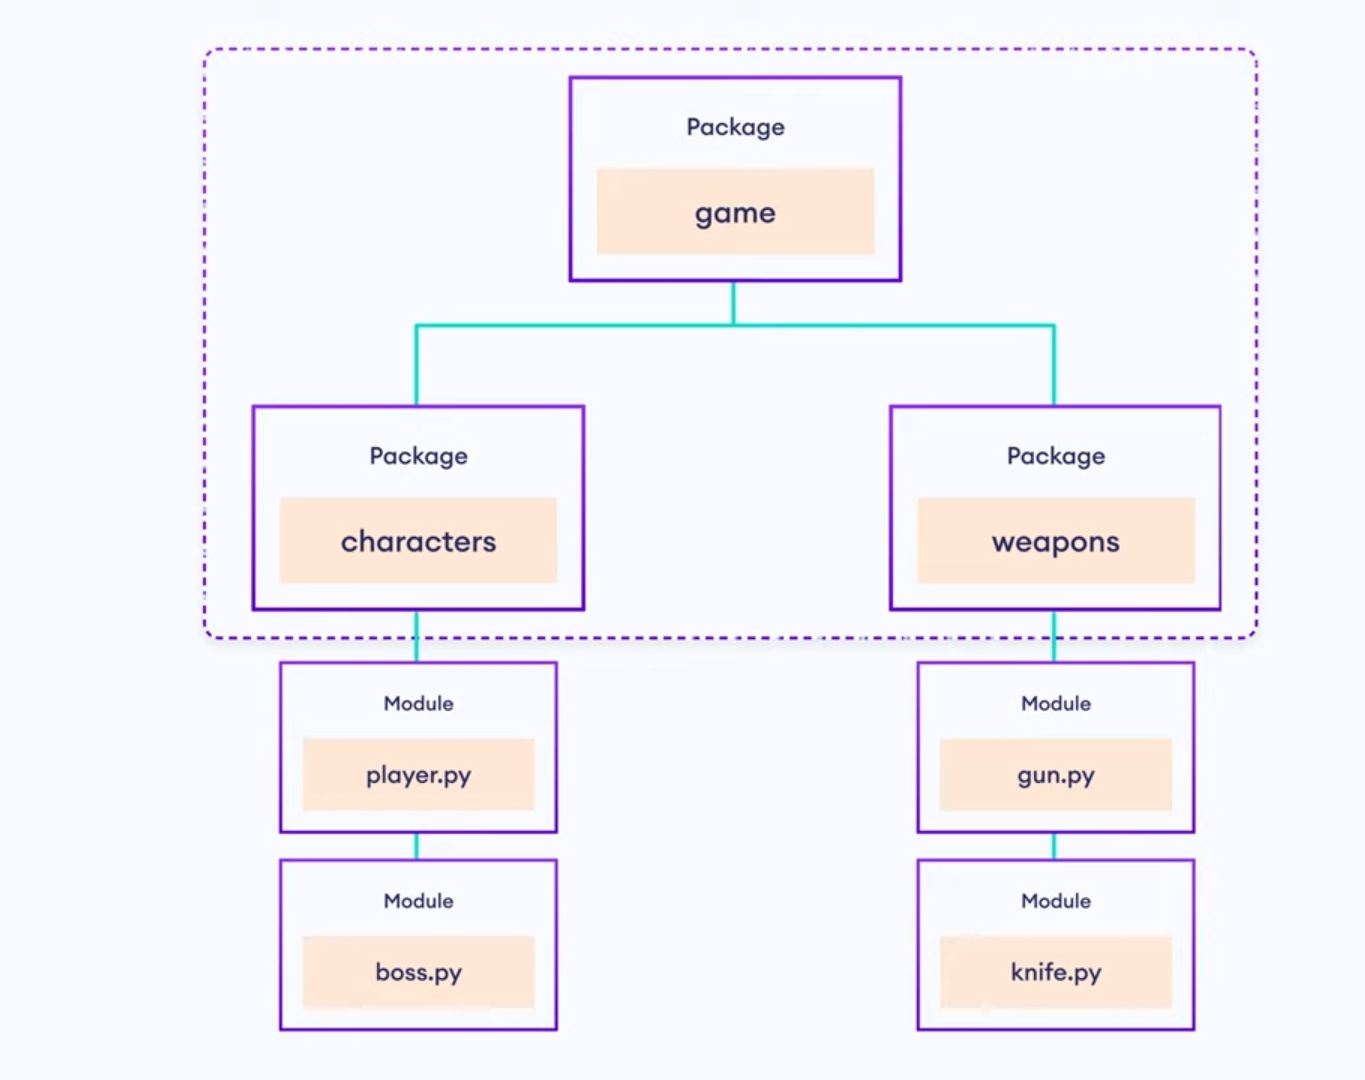

### Note:

A directory must contain a file named `__init__.py` in order for Python to consider it as a package. 
This file can be left empty but we generally place the initialization code for that package in this file.

Here, the similar `player` and `boss` modules are kept under the `characters` package. Also, `gun` and `knife` modules are kept inside the `weapons` package.

Then, both `characters` and `weapons` packages are kept inside the main `game` package.

As WE can see, our project looks much more organized and structured with the use of packages.

**Let's implement package this in code**.

1. Create a directory named game that will contain all our game components.

2. We also need to create an _ _init_ _.py file inside game directory. This special file tells Python that this directory is a Python package.

3. Also create the characters package(sub-package of game package) with an _ _init_ _.py file.

4. Now, create player.py and boss.py modules inside characters package.

In [ ]:
package_name/
│
├── __init__.py
│
└── sub_package1_name/
|    ├── __init__.py
|    ├── file1.py
|    ├── file2.py
└── sub_package2_name/
    ├── __init__.py
    ├── file1.py
    ├── file2.py


In `player.py`:
    
    def get_player_info():
        print("I am the main player.")

In `boss.py`:

    def get_boss_info():
        print("I am the enemy player.")

While developing large programs, these modules might contain classes and multiple functions.

Let's create a `main.py` file outside `game` package.

I can now import and use them in the following ways:

In `main.py`:
    
    import game.characters.player
    game.character.player.get_player_info()

In `main.py`:

    from game.characters import player
    player.get_player_info()

In `main.py`:

    from game.characters.boss import get_boss_info
    get_boss_info()

##### Using `__init__.py`

The code inside `__init__.py` runs automatically when we import the package.

Let's add a print statement in this file inside the game package.

In `__init__.py`:

    print("Initializing game features")

In `main.py`:

    from game.characters import player
    from game.characters.boss import get_boss_info

    player.get_player_info()
    get_boss_info()
    
`Output`:

    Initializing game features
    I am the main player.
    I am the enemy player.

## Python pip

There are thousands of useful packages tailored for specific tasks that are developed and maintained by the active Python community.

When you start working on more advanced projects, you will have to use these packages at some point rather than building everything from scratch.

For example, if you are working with web development, you will probably use packages like `django` or `flask`.

pip is the standard package manager for Python which helps to install and manage additional packages that are not available in the Python standard library.

### important pip commands

`pip install pandas` : To install a package

`pip install requests==2.21.0` : To install a specific version of package

`pip list` : To list all installed packages

`pip uninstall numpy` : To uninstall a package